# Rの導入と単回帰分析

### Quarto

`#`を使ったコメントよりも長い文章とともにコードを書きたい場合はQuartoファイルがおすすめ.
皆さんが開いているこのファイルがQuartoファイルである.
少し設定するだけで簡単にhtmlファイルやpdfファイルが作成できる.

以下の範囲に書かれたコードがRのコードとして認識される.
`{}`内を変更すればR以外の言語も実行できる.

In [ ]:
# code

右上の実行ボタンもしくは`ctrl + Enter`や`command + Enter`で実行できる.

### 作業ディレクトリの指定

現在の作業ディレクトリ(フォルダ)を確認するためには`getwd()`関数を利用する.
プロジェクトからではなく, 直接R(Studio)を開いた場合,
作業ディレクトリ(フォルダ)の指定が必要となる.
作業ディレクトリを指定しない場合,
Documentなどがデフォルトで指定されている場合が多い.

In [ ]:
getwd()

[1] "/cloud/project"

任意のディレクトリを指定するためには, `setwd()`関数を利用する.
ここでは移動するディレクトリがないので,
#をつけてRを実行しないようにしている.
パスの指定は相対パスでも絶対パスでもよい.

In [ ]:
#setwd("ここにパスを打ち込む")

### ディレクトリの内容を確認

現在のディレクトリにきちんと新しいフォルダが作成できたか確認する.
作業ディレクトリ内のファイルやフォルダを確認するには,
`list.files()`関数を利用する.

In [ ]:
list.files()

 [1] "02_simple_regression.qmd"       "02_simple_regression.rmarkdown"
 [3] "04_multiple-regression.qmd"     "05_binomial.qmd"               
 [5] "06_count-data.qmd"              "07_compare-model.qmd"          
 [7] "08_Hurdle-zero.qmd"             "09_beta-gamma.qmd"             
 [9] "10_ridge-lasso.qmd"             "11_multilevel.qmd"             
[11] "12_state-space.qmd"             "13_data_wrangling.qmd"         
[13] "14_estat.qmd"                   "data"                          
[15] "ipynb"                          "project.Rproj"                 
[17] "README.md"                     

### パッケージのインストール

パッケージのインストールをしてみる.
CRANに登録されたパッケージをインストールするには,
`install.packages()`関数を利用する.

In [ ]:
install.packages("dplyr")

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

### パッケージの利用

インストールされたファイルなどは適当な場所に保存されるのでユーザーが操作する必要はない.
インストールしたパッケージを利用するには,
`library()関数`で利用するパッケージ名を指定し, パッケージを読み込む.
この作業はセッションを再開する度に必要となる.

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

### `pacman`パッケージ

パッケージ管理については`pacman`が便利.
CRANに登録されているパッケージは`p_load()`関数を利用する.

インストールされていなければパッケージをインストールの上読み込み,
パッケージに更新があればアップデートの上で読み込み,
特に何もなければ読み込みを行ってくれる.

github上のパッケージは`p_load_gh()`関数を利用する.

In [ ]:
install.packages("pacman")

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

### `here`パッケージ

データの場所を指定するのに便利な`here`パッケージを利用してみる.
`here`パッケージは,
プロジェクト(`.Rproj`)を起点にデータがどこにあるのかOSに関わらず同様に記述できる.
`here()`関数の引数として,
フォルダ名とファイル名をそれぞれダブルクオーテーションで囲み,
カンマで繋ぐ.

In [ ]:
p_load(here)

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'rprojroot'


here installed

[1] "/cloud/project"

[1] "/cloud/project/フォルダ名/ファイル名"

### HELPの利用

パッケージや関数の利用についてわからないことがあればHELPを利用してみる.
HELPの出し方は`?`を知りたい関数やパッケージ名の前につけるだけでよい.
`?`を2個つける(`??`)と単語検索のように利用できる.

In [ ]:
?library
?ggplot2
??dplyr

### データの読み込み

『家計調査』2017年11月、第2−6表「年間収入階級別1世帯当たり1か月間の収入と支出」から作成した所得階級と支出のデータ`kakei201709_l18.csv`を用いる.
月間消費支出(円)(`CONS`), 月間消費支出(1万円)(`CONS1`),
年間収入(1万円)(INC), 有業人員(人)(`WORK`). いずれも調査世帯の平均値.

In [ ]:
kakei <- readr::read_csv(here("data", "kakei201709_l18.csv"))

Rows: 18 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): CONS, CONS1, INC, WORK

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

[1] "CONS"  "CONS1" "INC"   "WORK" 

### データ構造の把握

データを読み込んだらどのようなデータで構成されているのか確認を行う.
`dplyr`パッケージの`glimpse`関数を利用する.
`dplyr::glimpse`は`dplyr`パッケージの`glimpse`関数を利用することを明示的に示す記法であり,
`library`すれば基本的には必要はない.

In [ ]:
dplyr::glimpse(kakei)

Rows: 18
Columns: 4
$ CONS  <dbl> 136729, 183383, 188091, 220990, 233309, 242098, 244986, 254604, …
$ CONS1 <dbl> 13.6729, 18.3383, 18.8091, 22.0990, 23.3309, 24.2098, 24.4986, 2…
$ INC   <dbl> 154, 226, 275, 322, 372, 422, 473, 521, 573, 622, 672, 720, 771,…
$ WORK  <dbl> 0.49, 0.68, 0.59, 0.68, 0.85, 1.12, 1.31, 1.45, 1.50, 1.72, 1.70…

### 記述統計の確認

データ構造を確認したら, 次に記述統計を確認する. 記述統計を把握するには,
`summary`を利用する.

In [ ]:
summary(kakei)

      CONS            CONS1            INC              WORK       
 Min.   :136729   Min.   :13.67   Min.   : 154.0   Min.   :0.4900  
 1st Qu.:235506   1st Qu.:23.55   1st Qu.: 384.5   1st Qu.:0.9175  
 Median :281254   Median :28.13   Median : 597.5   Median :1.6000  
 Mean   :291127   Mean   :29.11   Mean   : 688.7   Mean   :1.4150  
 3rd Qu.:316269   3rd Qu.:31.63   3rd Qu.: 825.0   3rd Qu.:1.8275  
 Max.   :551735   Max.   :55.17   Max.   :2034.0   Max.   :2.1400  

### ヒストグラムの描画

記述統計を把握したら, ヒストグラムを描いてデータをグラフで確認する.
`ggplot2`パッケージをの`geom_histogram()`関数を使ってヒストグラムを描く.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

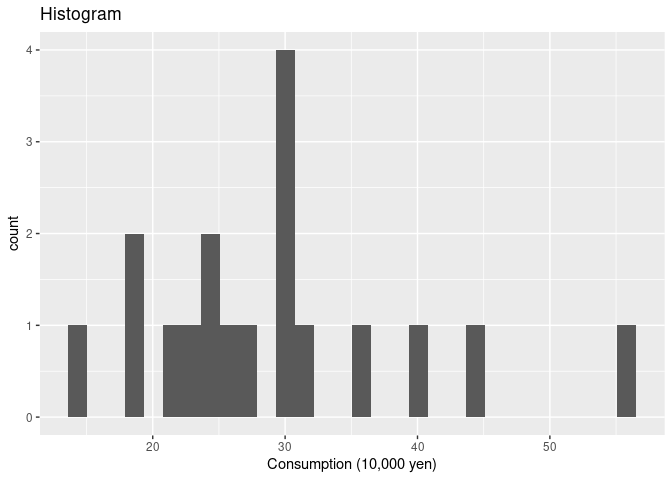

In [ ]:
ggplot(data = kakei) +
  aes(x = CONS1) +
  geom_histogram() +
  xlab("Consumption (10,000 yen)") +
  ggtitle("Histogram")

### 散布図の描画

2変数間の関係を把握するために散布図を描くには,
`geom_point()`関数を利用する.

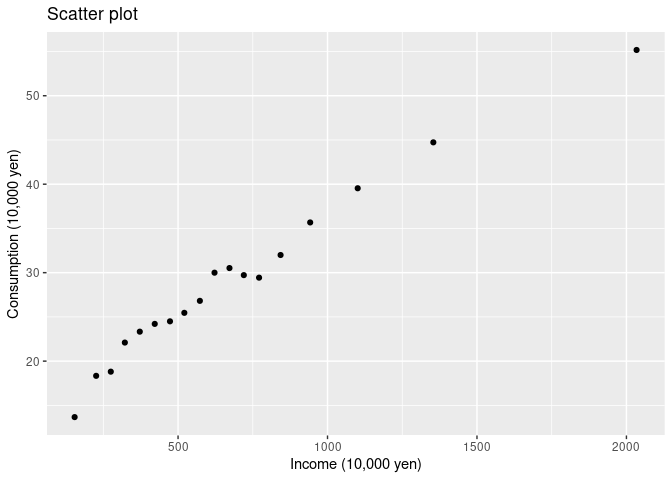

In [ ]:
ggplot(data = kakei) +
  aes(x = INC, 
      y = CONS1) +
  geom_point() + 
  xlab("Income (10,000 yen)") + 
  ylab("Consumption (10,000 yen)") +
  ggtitle("Scatter plot")

### 単回帰分析

最小二乗法を用いて単回帰分析を行うためには, `lm()`関数を利用する.
第1引数に分析のモデルを指定する. `~`の前に応答変数を,
`~`の後に説明変数を指定する.

In [ ]:
ols1 <- lm(CONS1 ~ INC, data = kakei)

### 結果の示し方

`summary()`関数で結果を見るのが一般的だが,
`jtools`パッケージの`summ()`関数や`stargazer`パッケージの`stargazer()`関数などを使うほうが良い.
`jtools`パッケージは自分が結果を見るときに使うのがおすすめ.
`stargazer`パッケージは結果をそのまま論文などに転載したいときにおすすめ.

In [ ]:
p_load(jtools)
jtools::summ(ols1)

MODEL INFO:
Observations: 18
Dependent Variable: CONS1
Type: OLS linear regression 

MODEL FIT:
F(1,16) = 584.11, p = 0.00
R² = 0.97
Adj. R² = 0.97 

Standard errors:OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         14.35   0.73    19.71   0.00
INC                  0.02   0.00    24.17   0.00
------------------------------------------------

### 回帰係数の95%信頼区間を表示

回帰係数の95%信頼区間を表示するには, `summ(confint = TRUE)`を指定する.

In [ ]:
summ(ols1, confint = TRUE)

MODEL INFO:
Observations: 18
Dependent Variable: CONS1
Type: OLS linear regression 

MODEL FIT:
F(1,16) = 584.11, p = 0.00
R² = 0.97
Adj. R² = 0.97 

Standard errors:OLS
---------------------------------------------------------
                     Est.    2.5%   97.5%   t val.      p
----------------- ------- ------- ------- -------- ------
(Intercept)         14.35   12.81   15.89    19.71   0.00
INC                  0.02    0.02    0.02    24.17   0.00
---------------------------------------------------------

### 結果を論文に掲載する

結果を論文に掲載できるようにきれいに整形するには`stargazer`パッケージを利用するのが便利.
様々な引数があるので, 使いこなすにはHELPを参照.
`star.cutoffs = NA, omit.table.layout = "n"`は忘れない.
分析がしたいのであって, 天体観測がしたいわけではないことに注意.

In [ ]:
p_load(stargazer)
stargazer::stargazer(ols1,
                     type              = "text",
                     style             = "all", 
                     ci                = TRUE,
                     star.cutoffs      = NA, 
                     omit.table.layout = 'n',
                     align             = TRUE)


                          Dependent variable:       
                    --------------------------------
                                 CONS1              
----------------------------------------------------
INC                              0.021              
                             (0.020, 0.023)         
                               t = 24.168           
                               p = 0.000            
Constant                         14.350             
                            (12.923, 15.777)        
                               t = 19.713           
                               p = 0.000            
----------------------------------------------------
Observations                       18               
R2                               0.973              
Adjusted R2                      0.972              
Residual Std. Error         1.680 (df = 16)         
F Statistic         584.114 (df = 1; 16) (p = 0.000)

### 散布図と回帰直線

散布図に回帰直線を引きたい場合には, `geom_smooth()`関数を利用する.

`geom_smooth()` using formula = 'y ~ x'

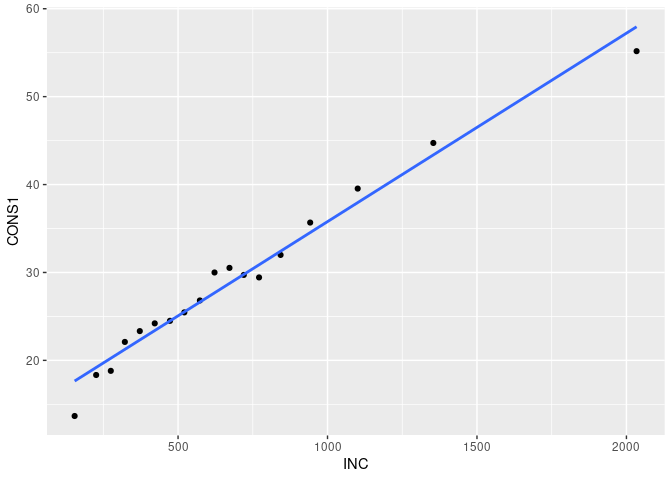

In [ ]:
ggplot(data = kakei) +
  aes(x = INC,
      y = CONS1) +
  geom_point() +
  geom_smooth(method = "lm", 
              se     = FALSE)

### 予測(新しい説明変数のデータセットを作成)

データを予測するため, まずは新しい説明変数のデータセットを作成する.
データの列名は分析に利用したものと同じ名前, 同じ列数である必要性がある.
簡単のため, 単回帰で行うが重回帰でも問題なく予測できる.

In [ ]:
new_dat <- data.frame(
  INC = seq(from       = 50,
            to         = 2050,
            length.out = 20)
)

### 予測

データを予測するためには, `predict()`関数を利用する.
第1引数に回帰分析の結果のオブジェクト,
`newdata`に新しい説明変数のデータフレーム, `interval`に求めたい区間,
`level`に$100(1 - \alpha)\%$区間の値を指定する.
`interval = "confidence"`で信頼区間が,
`interval = "prediction"`で予測区間が求められる.

In [ ]:
ci <- predict(ols1, 
              newdata  = new_dat, 
              interval = "confidence",
              level    = 0.95)
ci <- bind_cols(new_dat, ci)
pred <- predict(ols1, 
                newdata  = new_dat, 
                interval = "prediction",
                level    = 0.95)
pred <- bind_cols(new_dat, pred)

### 予測区間の図示

データの散布図に予測区間を図示する.

`geom_smooth()` using formula = 'y ~ x'

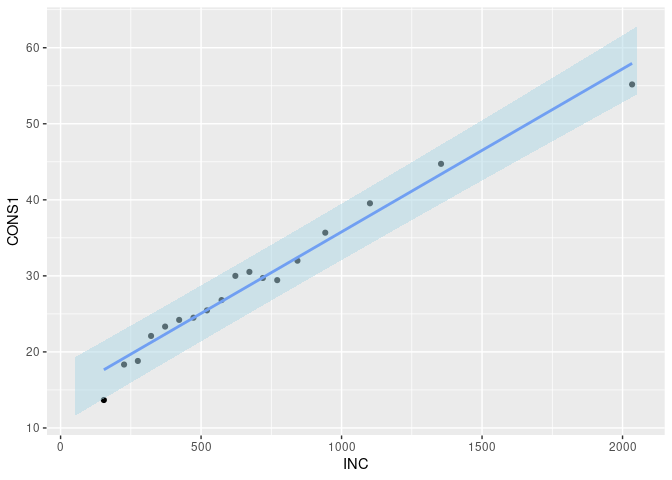

In [ ]:
ggplot() +
  aes(x = INC) +
  geom_point(
    data = kakei,
    aes(y = CONS1)) +
  geom_smooth(
    data   = kakei,
    aes(y = CONS1),
    method = "lm",
    se     = FALSE) +
  geom_ribbon(
    data     = pred,
    aes(ymin = lwr,
        ymax = upr),
    fill     = "lightblue",
    alpha    = 0.5)

### `geom_smooth()`と区間

`geom_smooth()`関数を利用するとデフォルトでは回帰直線とともに,
区間が表示されている. これは回帰直線の信頼区間.

`geom_smooth()` using formula = 'y ~ x'

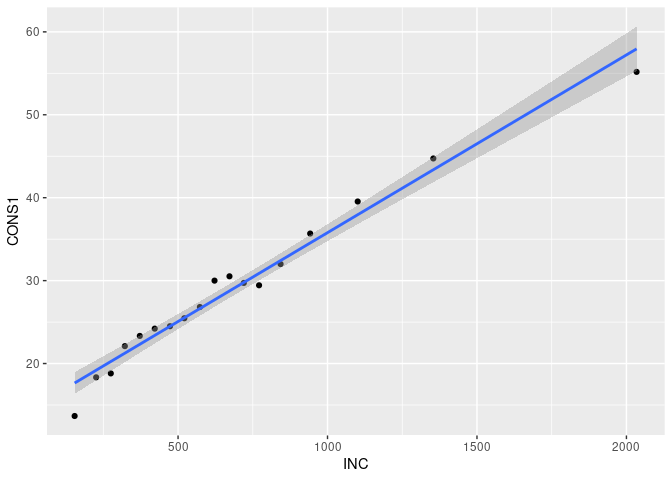

In [ ]:
ggplot(data = kakei) +
  aes(x = INC,
      y = CONS1) +
  geom_point() +
  geom_smooth(
    method = "lm"
  )

### 回帰直線の信頼区間

`add_ci()`関数で推定した値と`geom_smooth(se = TRUE)`は一致する.

`geom_smooth()` using formula = 'y ~ x'

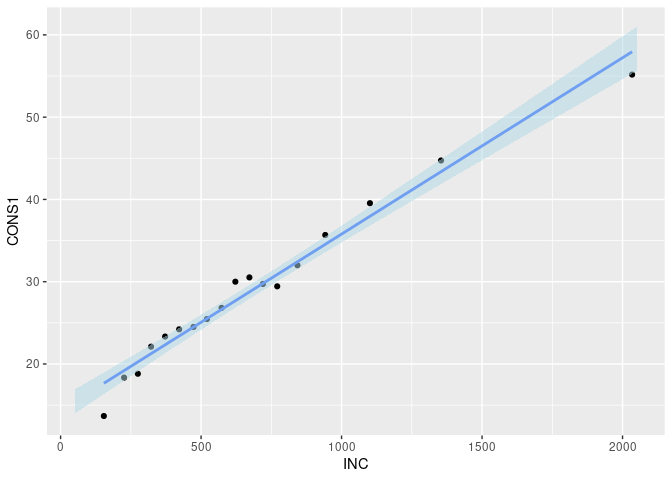

In [ ]:
ggplot() +
  aes(x = INC) +
  geom_point(
    data = kakei,
    aes(y = CONS1)) +
  geom_smooth(
    data   = kakei,
    aes(y = CONS1),
    method = "lm",
    se     = FALSE) +
  geom_ribbon(
    data     = ci,
    aes(ymin = lwr,
        ymax = upr),
    fill     = "lightblue",
    alpha    = 0.5)